* Add photo header

# Modeling

In this notebook, we iterate through different versions of a regression model to create the most accurate model for predicting home prices.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#load clean dataset
data = pd.read_csv('data/housing_data_clean.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  float64
 8   view           21596 non-null  float64
 9   condition      21596 non-null  int64  
 10  sqft_above     21596 non-null  int64  
 11  sqft_basement  21596 non-null  float64
 12  yr_built       21596 non-null  int64  
 13  yr_renovated   21596 non-null  float64
 14  zipcode        21596 non-null  int64  
 15  lat            21596 non-null  float64
 16  long           21596 non-null  float64
 17  sqft_living15  21596 non-null  int64  
 18  sqft_l

## Model 1: Baseline

This model will be the baseline for which we base all other models. This model does not take into account categorical variables, outliers, or other data transformations.

In [4]:
# Define functions to be used. Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [5]:
# drop non-numerical columns like id and date.
y = data['price']
X = data.drop(['price', 'id', 'date'], axis=1)

In [6]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [7]:
# perform linear regression in scikitlearn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [8]:
metrics.r2_score(y_train, y_hat_train)

0.6707918326331238

In [9]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2198.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:11:55   Log-Likelihood:            -2.3634e+05
No. Observations:               17276   AIC:                         4.727e+05
Df Residuals:                   17259   BIC:                         4.728e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.36e+06   3.44e+06     -0.686      0.493    -9.1e+06    4.38e+06
bedrooms      -5.052e+04   2296.492    -21.999      0.000    -5.5e+04    -4.6e+04
bathrooms       5.86e+04   3830.862     15.296      0.000    5.11e+04    6.61e+04
sqft_lot          0.1514      0.054      2.811      0.005       0.046       0.257
floors         1.911e+04   4206.690      4.542      0.000    1.09e+04    2.74e+04
waterfront     5.711e+05   2.08e+04     27.402      0.000     5.3e+05    6.12e+05
view           5.996e+04   2479.967     24.176      0.000    5.51e+04    6.48e+04
condition      2.778e+04   2767.952     10.036      0.000    2.24e+04    3.32e+04
sqft_above      249.5904      3.987     62.600      0.000     241.775     257.406
sqft_basement   187.5434      5.057     37.089      0.000     177.632     197.455
yr_built      -2019.8535     82.456    -24.496      0.000   -2181.475   -1858.232
yr_renovated     28.6307      4.660      6.144      0.000      19.497      37.765
zipcode        -659.9187     38.819    -17.000      0.000    -736.008    -583.829
lat            6.836e+05   1.25e+04     54.783      0.000    6.59e+05    7.08e+05
long           -3.14e+05   1.53e+04    -20.581      0.000   -3.44e+05   -2.84e+05
sqft_living15    62.3981      3.906     15.976      0.000      54.742      70.054
sqft_lot15       -0.4891      0.085     -5.722      0.000      -0.657      -0.322
==============================================================================
Omnibus:                    13675.916   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1079376.874
Skew:                           3.241   Prob(JB):                         0.00
Kurtosis:                      41.177   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This initial model has an R-squared value of .67. Also, all of our features appear to be statistically significant with p-values less than 0.05. It appears waterfront and latitude have the strongest positive effect on price, while longitude and bedrooms have the strongest negative affect. We will definitely need to look into this variables closer, and investigate why bedrooms would have a negative affect on price.

Let's also look at the RMSE values to see how well our model works.

In [10]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 211378.2182045845
RMSE Test: 206576.069094622


The train dataset's RMSE is relatively close to the test dataset's, with a root mean squared error around 200k. This model seems to be a good starting point.

## Model 2: Dealing with Categorical Variables

Now that we have our baseline model established, let's do some additional tuning of the model to account for categorical variables to potentially increase our R-squared value.

First, let's return to the histograms for all columns and inspect the distribution of the data and whether or not the variables are continuous or categorical.

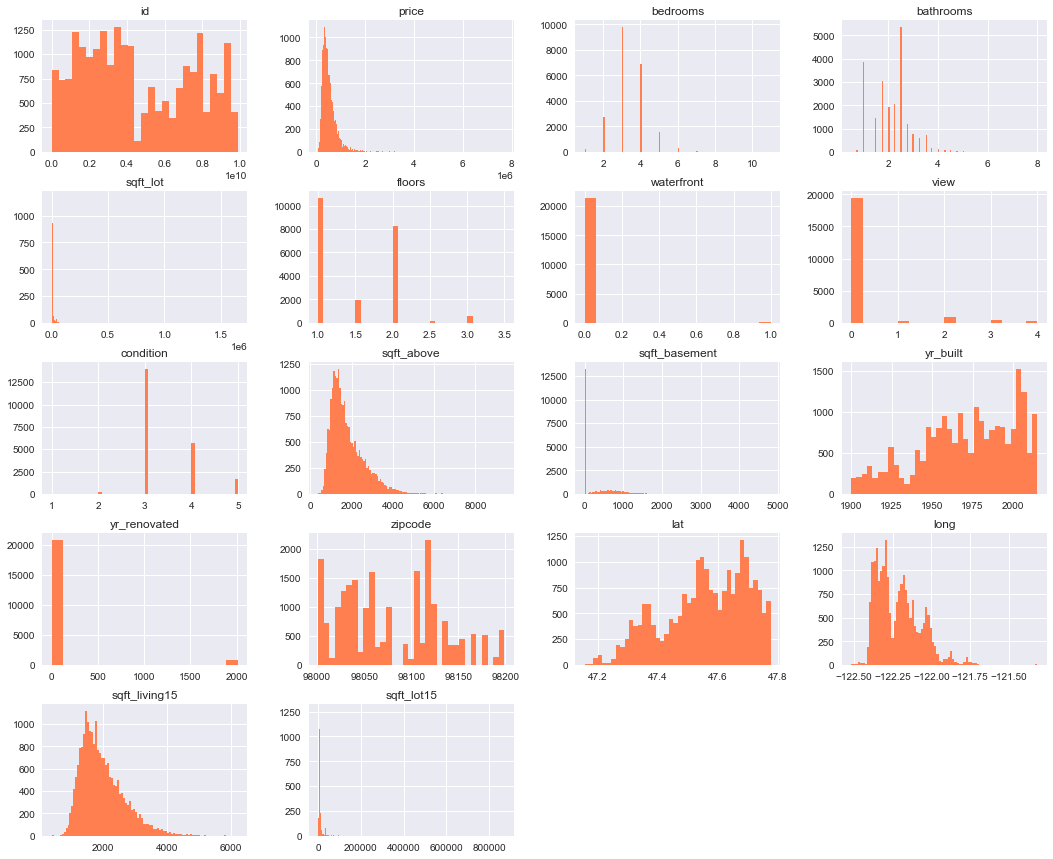

In [11]:
data.hist(figsize=(18,15), bins = 'auto', color='coral');

Based on these histograms, the following columns appear to be categorical:
* bedrooms
* bathrooms
* floors
* waterfront
* view
* condition
* grade

This is because these columns have distinct, discrete values for each home. Some of these variables need to be further investigated, but let's address these clearly categorical columns for now.

It appeared in our first model that bedrooms had a negatively correlated relationship with sales price. Since this seems counterintuitive, let's explore this variable further.


C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


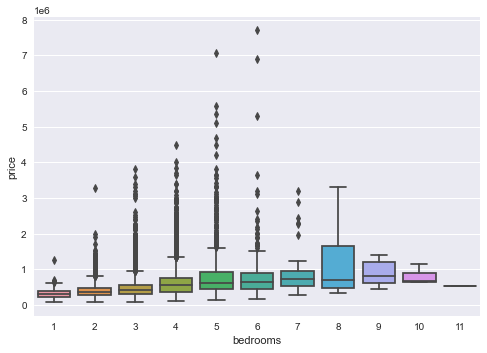

In [12]:
sns.boxplot(data.bedrooms, data.price);

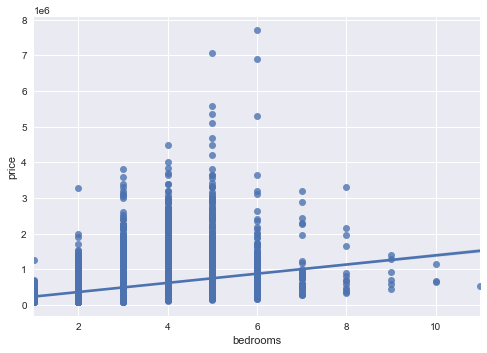

In [13]:
sns.regplot(x="bedrooms", y="price", data=data);

There does seem to be a slightly positive relationship between price and bedrooms, but this relationship doesn't hold as well when bedrooms increases past 5. Binning bedrooms into categories may solve this issue.

Let's now separate these columns into continuous and categorical variables to be handled separately.

In [14]:
conts = []
cats = []
for col in data.columns:
    if data[col].nunique()<30:
        cats.append(col)
    else:
        conts.append(col)

In [15]:
conts

['id',
 'date',
 'price',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [16]:
cats

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

Using a cutoff of unique values less than 30, we get the same resulting categorical columns as when we viewed the histograms for each column.

However, we noticed earlier that zipcodes were included in our dataset. These shouldn't really be considered continuous, as zipcode is a discrete value. Since there are 70 zipcodes in the dataset, let's include our zipcodes as categorical and bin into groups based on number.

In [17]:
conts.remove('zipcode')
cats.append('zipcode')

In [18]:
cats

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode']

Longitude and latitude are also included in the dataset. It could be a good idea to separate these into quadrants--longitude and latitude may be a better indicator of price than zipcode, but we will leave both in our model for now.

In [19]:
# explore lat and long to decide cutoff points for the quandrants

data.lat.describe()

count    21596.000000
mean        47.560087
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [20]:
data.long.describe()

count    21596.000000
mean      -122.213977
std          0.140725
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

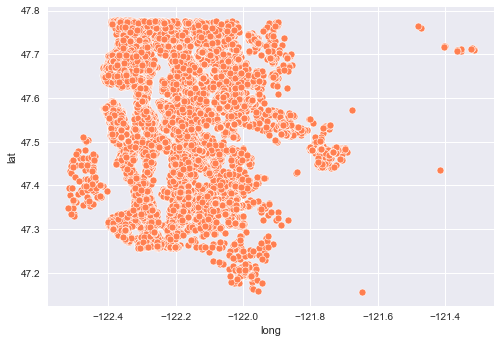

In [21]:
sns.scatterplot(data=data, x="long", y="lat", color="coral");

Let's use 47.5 as our cutoff for latitude and -122.2 for longitude.

In [22]:
# create a formula for determining which quadrant the data falls in.

def quadrant(lat, long):
    if (lat >= 47.5) & (long <=-122.2):
        return 1
    elif (lat >= 47.5) & (long >-122.2):
        return 2
    elif (lat < 47.5) & (long <=-122.2):
        return 3
    else:
        return 4

In [23]:
data['coordinates'] = data.apply(lambda x: list([x['lat'], x['long']]), axis=1)

In [24]:
# create a new column called quadrant that categorizes the location

data['quadrant']= data['coordinates'].apply(lambda x: quadrant(x[0],x[1]))

In [25]:
data.quadrant.value_counts()

1    9220
2    5775
4    3503
3    3098
Name: quadrant, dtype: int64

In [26]:
# add quadrant to our categorical variable list

cats.append('quadrant')


In [27]:
data.drop('coordinates', inplace=True, axis=1)

Revisiting the histogram for basement, it appears any house without a basement has a 'sqft_basement' value of zero. It may make more sense to turn this into a categorical variable, where a value of 1 means there is a basement and 0 means there is not.

In [28]:
data['has_basement'] = np.where(data['sqft_basement']>0,1,0)

### One Hot Encoding Categorical Variables

In [29]:
df_cat = data.loc[:,cats]

In [30]:
df_cat

,bedrooms,bathrooms,floors,waterfront,view,condition,zipcode,quadrant
0,3,1.00,1.0,0.0,0.0,3,98178,1
1,3,2.25,2.0,0.0,0.0,3,98125,1
2,2,1.00,1.0,0.0,0.0,3,98028,1
3,4,3.00,1.0,0.0,0.0,5,98136,1
4,3,2.00,1.0,0.0,0.0,3,98074,2
...,...,...,...,...,...,...,...,...
21591,3,2.50,3.0,0.0,0.0,3,98103,1
21592,4,2.50,2.0,0.0,0.0,3,98146,1
21593,2,0.75,2.0,0.0,0.0,3,98144,1
21594,3,2.50,2.0,0.0,0.0,3,98027,2


In [31]:
df_cat.nunique()

bedrooms      11
bathrooms     29
floors         6
waterfront     2
view           5
condition      5
zipcode       70
quadrant       4
dtype: int64

In [32]:
# Check the range of values for bathrooms to see if binning is appropriate.
df_cat.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Since bathrooms has a large number of categories (20+) let's categorize this bathroom data into bins.

In [33]:
# use cut function to put bathroom data into bins

df_cat['bathrooms'] = pd.cut(df_cat.bathrooms, [0, 1, 2, 3, 4, 5, 6, 8], 
                             labels = ['0_to_1', '1_to_2', '2_to_3', '3_to_4', '4_to_5', '5_to_6', '6_plus'])

In [34]:
df_cat.bathrooms.value_counts()

2_to_3    9362
1_to_2    6431
0_to_1    3926
3_to_4    1611
4_to_5     223
5_to_6      33
6_plus      10
Name: bathrooms, dtype: int64

Bedrooms may also be helpful to bin, since there are 12 categories.

In [35]:
df_cat['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [36]:
df_cat['bedrooms'] = pd.cut(df_cat.bedrooms, [0,1,2,3,4,5,33],
                           labels = ['1','2','3','4','5','6_plus'])

Let's also categorize the zipcode data as we mentioned earlier.


In [37]:
# check the range of values for zipcodes to see the best way to properly bin.
df_cat.groupby(by='zipcode').count()

,bedrooms,bathrooms,floors,waterfront,view,condition,quadrant
zipcode,,,,,,,
98001,361,361,361,361,361,361,361
98002,199,199,199,199,199,199,199
98003,280,280,280,280,280,280,280
98004,317,317,317,317,317,317,317
98005,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...
98177,255,255,255,255,255,255,255
98178,262,262,262,262,262,262,262
98188,136,136,136,136,136,136,136


There are about 200 zipcodes between the first and last zipcodes, so let's separate into 4 groups.

In [38]:
df_cat['zipcode'] = pd.cut(df_cat.zipcode, [98000, 98050, 98100, 98150, 98200],
                                labels = ['98001_to_98050','98051_to_98100', '98101_to_98150', '98150_to_98200'])

In [39]:
# Use a for loop to create a new dataframe of dummy variables
dataset = pd.DataFrame()
for col in df_cat.columns:
    col_dummies = pd.get_dummies(df_cat[col], prefix = str(col)[:5], drop_first=True)
    dataset = pd.concat([dataset, col_dummies], axis=1)

dataset

,bedro_2,bedro_3,bedro_4,bedro_5,bedro_6_plus,bathr_1_to_2,bathr_2_to_3,bathr_3_to_4,bathr_4_to_5,bathr_5_to_6,...,condi_2,condi_3,condi_4,condi_5,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21592,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21593,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21594,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [40]:
data_model_2 = pd.concat([data, dataset], axis=1)

data_model_2.drop(columns=cats, inplace=True)

In [41]:
data_model_2.columns

Index(['id', 'date', 'price', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'has_basement', 'bedro_2', 'bedro_3', 'bedro_4',
       'bedro_5', 'bedro_6_plus', 'bathr_1_to_2', 'bathr_2_to_3',
       'bathr_3_to_4', 'bathr_4_to_5', 'bathr_5_to_6', 'bathr_6_plus',
       'floor_1.5', 'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5',
       'water_1.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condi_2',
       'condi_3', 'condi_4', 'condi_5', 'zipco_98051_to_98100',
       'zipco_98101_to_98150', 'zipco_98150_to_98200', 'quadr_2', 'quadr_3',
       'quadr_4'],
      dtype='object')

In [42]:
data_model_2.drop(columns=['lat', 'long', 'sqft_basement'], inplace=True)

### Run New Model

In [43]:
y = data_model_2['price']
X = data_model_2.drop(['price', 'id', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [44]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_hat_train = model_2.predict(X_train)
y_hat_test = model_2.predict(X_test)

In [45]:
metrics.r2_score(y_train, y_hat_train)

0.7043320241482438

Our R-squared score has improved from .67 to .7. Let's also look at the model summary and see if any insights can be gained to further improve the model and check the RMSE.

In [46]:
X_int = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_int).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1081.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:12:20   Log-Likelihood:            -2.3562e+05
No. Observations:               17276   AIC:                         4.713e+05
Df Residuals:                   17237   BIC:                         4.716e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.196e+06   1.83e+05     11.966      0.000    1.84e+06    2.56e+06
sqft_lot                 0.1782      0.055      3.219      0.001       0.070       0.287
sqft_above             221.4292      4.043     54.769      0.000     213.505     229.354
yr_built             -1153.1352     91.534    -12.598      0.000   -1332.551    -973.719
yr_renovated            37.4787      4.575      8.191      0.000      28.510      46.447
sqft_living15          102.8563      3.835     26.820      0.000      95.339     110.373
sqft_lot15              -0.4028      0.085     -4.720      0.000      -0.570      -0.236
has_basement          9.997e+04   4198.339     23.811      0.000    9.17e+04    1.08e+05
bedro_2               1.554e+04   1.68e+04      0.925      0.355   -1.74e+04    4.85e+04
bedro_3              -6160.8053   1.67e+04     -0.368      0.713    -3.9e+04    2.66e+04
bedro_4              -3.256e+04   1.71e+04     -1.902      0.057   -6.61e+04     986.914
bedro_5              -4.615e+04    1.8e+04     -2.564      0.010   -8.14e+04   -1.09e+04
bedro_6_plus         -1.055e+05   2.12e+04     -4.979      0.000   -1.47e+05   -6.39e+04
bathr_1_to_2          7446.1055   5333.711      1.396      0.163   -3008.509    1.79e+04
bathr_2_to_3          2.323e+04   6775.268      3.429      0.001    9950.274    3.65e+04
bathr_3_to_4          1.411e+05   1.02e+04     13.830      0.000    1.21e+05    1.61e+05
bathr_4_to_5          3.748e+05   1.85e+04     20.229      0.000    3.38e+05    4.11e+05
bathr_5_to_6          8.921e+05   4.15e+04     21.514      0.000    8.11e+05    9.73e+05
bathr_6_plus          1.317e+06   6.75e+04     19.525      0.000    1.18e+06    1.45e+06
floor_1.5            -2.013e+04   6206.166     -3.244      0.001   -3.23e+04   -7967.707
floor_2.0            -3.504e+04   5140.188     -6.818      0.000   -4.51e+04    -2.5e+04
floor_2.5             1.296e+05   1.88e+04      6.900      0.000    9.28e+04    1.66e+05
floor_3.0             3.602e+04   1.12e+04      3.217      0.001    1.41e+04     5.8e+04
floor_3.5             2.782e+05   9.11e+04      3.056      0.002    9.98e+04    4.57e+05
water_1.0             5.871e+05   2.26e+04     25.938      0.000    5.43e+05    6.31e+05
view_1.0              9.304e+04   1.31e+04      7.128      0.000    6.75e+04    1.19e+05
view_2.0              7.152e+04   7692.855      9.297      0.000    5.64e+04    8.66e+04
view_3.0               1.52e+05   1.07e+04     14.240      0.000    1.31e+05    1.73e+05
view_4.0              3.316e+05   1.55e+04     21.326      0.000    3.01e+05    3.62e+05
condi_2                8.55e+04   4.68e+04      1.826      0.068   -6285.264    1.77e+05
condi_3               1.003e+05   4.35e+04      2.305      0.021     1.5e+04    1.86e+05
condi_4               1.445e+05   4.35e+04      3.321    

In [47]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 202683.2122704163
RMSE Test: 189802.41396018508


Our RMSE has also slightly improved.

Looking at p-values in the table, it looks like not all of our features are statistically significant using a p-value cut off of 0.05. We are still seeing negative coefficients as the number of bedrooms increase, however, it now appears these features are below our level of significance. Interestingly, bathrooms do have a significant relationship with price in the positive direction, which makes more sense. The location of the home as it relates to quadrants also seems to be important.

Let's remove some of these features with p-values above 0.05 to simplify our model.

## Model 3: Remove Statistically Insignificant Features

### Drop Insignificant Features Using Stepwise Function

Let's use a stepwise selection function to choose columns only with p-values less than 0.05.

In [48]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [49]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-48-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-48-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-48-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-48-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-48-3a06d07146b7>:24: 

<ipython-input-48-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-48-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['sqft_above', 'view_4.0', 'has_basement', 'quadr_4', 'quadr_3', 'yr_built', 'water_1.0', 'sqft_living15', 'quadr_2', 'bathr_5_to_6', 'bathr_4_to_5', 'bathr_6_plus', 'bathr_3_to_4', 'view_3.0', 'zipco_98051_to_98100', 'view_2.0', 'yr_renovated', 'floor_2.0', 'zipco_98150_to_98200', 'view_1.0', 'zipco_98101_to_98150', 'floor_2.5', 'condi_5', 'bedro_6_plus', 'bedro_4', 'bedro_5', 'condi_4', 'floor_3.0', 'bedro_2', 'sqft_lot15', 'bathr_2_to_3', 'floor_1.5', 'sqft_lot', 'floor_3.5']


In [50]:
new_x_cols

['sqft_above',
 'view_4.0',
 'has_basement',
 'quadr_4',
 'quadr_3',
 'yr_built',
 'water_1.0',
 'sqft_living15',
 'quadr_2',
 'bathr_5_to_6',
 'bathr_4_to_5',
 'bathr_6_plus',
 'bathr_3_to_4',
 'view_3.0',
 'zipco_98051_to_98100',
 'view_2.0',
 'yr_renovated',
 'floor_2.0',
 'zipco_98150_to_98200',
 'view_1.0',
 'zipco_98101_to_98150',
 'floor_2.5',
 'condi_5',
 'bedro_6_plus',
 'bedro_4',
 'bedro_5',
 'condi_4',
 'floor_3.0',
 'bedro_2',
 'sqft_lot15',
 'bathr_2_to_3',
 'floor_1.5',
 'sqft_lot',
 'floor_3.5']

In [51]:
print(len(X.columns), len(new_x_cols))

38 34


### Run New Model

In [52]:
data_model_3 = data_model_2.copy()



In [53]:
y = data_model_3['price']
X = data_model_3[new_x_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [54]:
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
y_hat_train = model_3.predict(X_train)
y_hat_test = model_3.predict(X_test)

In [55]:
metrics.r2_score(y_train, y_hat_train)

0.7041945593248053

In [56]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 202730.32351777924
RMSE Test: 189767.50692709704


In [57]:
# Perform cross validation
from sklearn.metrics import mean_squared_error, make_scorer
mse = make_scorer(mean_squared_error)

cv_20_results = cross_val_score(model_3, X,y, cv=20, scoring=mse)
np.mean(np.sqrt(cv_20_results))

201323.0115000407

Our Rsquared value and root mean squared error values stayed nearly even with our previous model. Since this version of the model has been simplified to use fewer insignificant features without losing accuracy, we will proceed with this version of the model.

Now is a good time to check if our assumptions for linear regression are in place.

### Check Normality Assumption

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_int = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_int).fit()

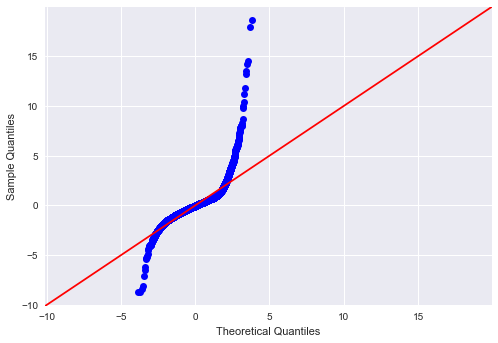

In [59]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

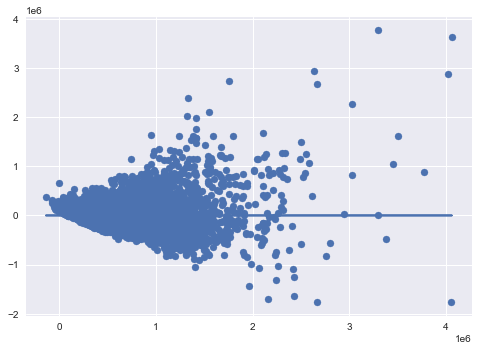

In [60]:
plt.scatter(model_3.predict(X_int), model_3.resid)
plt.plot(model_3.predict(X_int), [0 for i in range(len(X_int))]);

According to the QQ-plot, it appears the normality assumption is violated at both tails of the data. It also looks like homoscedasticity is being violated, as there is a clear cone shape in the scatter plot of the residuals. Let's remove outliers and see if it helps our data meet these assumptions.

## Model 4: Remove Outliers

In [61]:
# remove unnecessary columns dropped in our last model
del_x_cols = []
for col in data_model_3.columns:
    if col not in new_x_cols:
        del_x_cols.append(col)

In [62]:
del_x_cols

['id', 'date', 'price', 'bedro_3', 'bathr_1_to_2', 'condi_2', 'condi_3']

In [65]:
del_x_cols.remove('price')

In [66]:
data_model_3.drop(del_x_cols, axis=1, inplace=True)

### Explore Distribution of Data

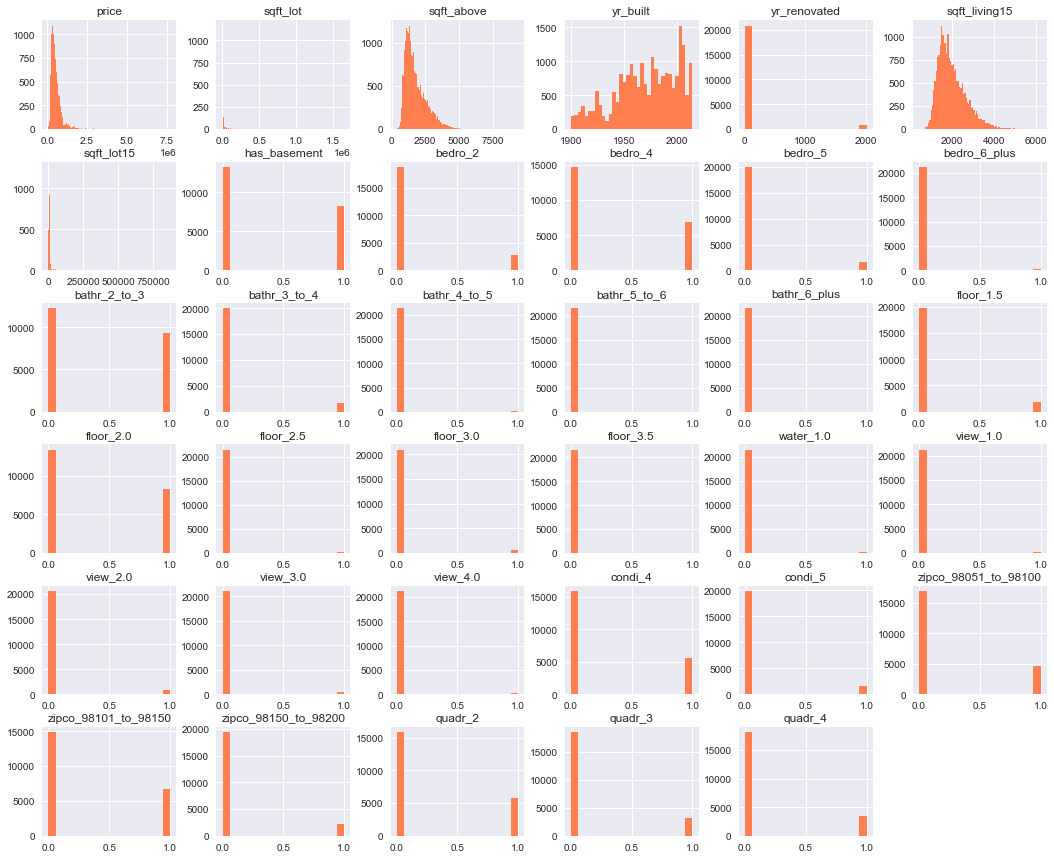

In [67]:
data_model_3.hist(figsize=(18,15), bins = 'auto', color='coral');

It looks like there are a number of outliers in some of our independent variables and our dependent variable, price. Let's take a closer look at price, since often removing outliers in the dependent variable can eliminate outliers in other variables.

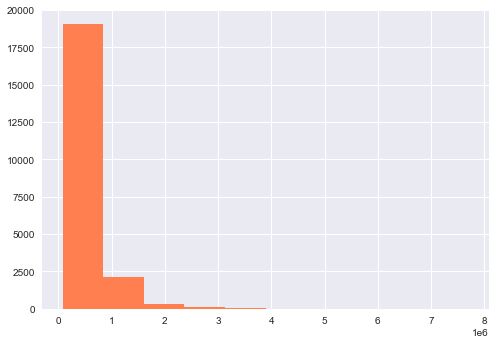

In [68]:
data_model_3.price.hist(color='coral');

<AxesSubplot:xlabel='price'>

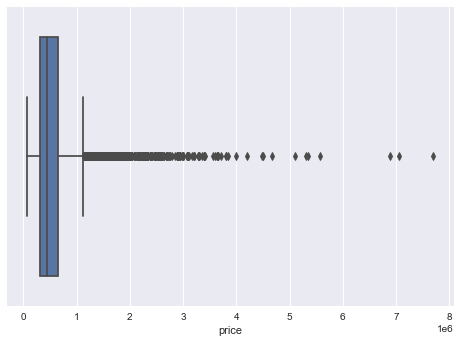

In [69]:
sns.boxplot(x=data_model_3['price'])

It looks like it might be a good idea to remove any homes above 2 million dollars in price. Since ABC agency's clients are younger, price-sensitive individuals with less money to invest in homes above $2 million, it seems reasonable to eliminate these outliers. Before removing these outliers, let's check if using Z-score to eliminate outliers is a good strategy.

### Remove Price Outliers based on Z-Score

In [70]:
z = np.abs(stats.zscore(data_model_3.price))
z

array([0.86668512, 0.00623887, 0.98073984, ..., 0.37616542, 0.38188449,
       0.58603973])

In [71]:
data_model_4a = data_model_3[(z<3)]

In [72]:
data_model_4a.shape

(21190, 35)

<AxesSubplot:>

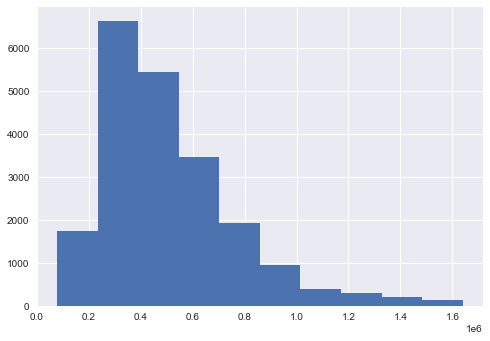

In [73]:
data_model_4a.price.hist()

It looks like removing outliers using z-score achieved our goal of eliminating price under 2 million. Let's run a new model and check if losing this data affected the model's accuracy.

In [74]:
y = data_model_4a['price']
X = data_model_4a.drop(['price'], axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
model_4a = LinearRegression()
model_4a.fit(X_train, y_train)
y_hat_train = model_4a.predict(X_train)
y_hat_test = model_4a.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6931772694985451

In [76]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 144186.62852507771
RMSE Test: 141225.07595758783


In [77]:
data_model_4a.shape[0]-data_model_3.shape[0]

-406

It looks like we lost about 400 values by eliminating outliers using z-score. Our model also lost some accuracy, dropping to an Rsquared value of .69. Our RMSE, however, decreased significantly. Let's check if removing outliers a different way returns a better model.

### Aternate Aproach: Remove Outliers Based on Price Cutoff

In [78]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data_model_3.price.quantile(q=q)))

0.8 percentile: 700500.0
0.81 percentile: 718000.0
0.82 percentile: 730000.8999999999
0.83 percentile: 749950.0
0.84 percentile: 760004.0
0.85 percentile: 779807.5
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836799.9999999993
0.89 percentile: 859972.0
0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [79]:
orig_tot = len(data_model_3)
data_model_4b = data_model_3[data_model_3.price < 2000000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data_model_4b))/orig_tot)
# data_new.price = data_new.price.map(np.log) # Applying a log transformation

Percent removed: 0.009631413224671235


<AxesSubplot:>

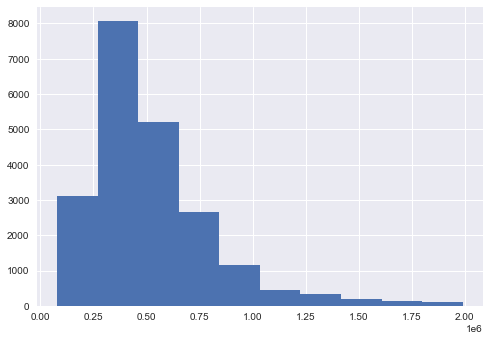

In [80]:
data_model_4b.price.hist()

In [81]:
# Refit model with subset features
y = data_model_4b['price']
X = data_model_4b.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

model_4b = LinearRegression()
model_4b.fit(X_train, y_train)
y_hat_train = model_4b.predict(X_train)
y_hat_test = model_4b.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.7013577270539813

In [82]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 156653.25397445422
RMSE Test: 158064.36346815663


In [83]:
data_model_4b.shape[0]-data_model_3.shape[0]

-208

Removing outliers in this way gave us a slightly better R squared score than by using z-score. Our RMSE also improved over model 3. We were able to preserve about 200 more values in this method, so let's use this model going forward.

### Recheck Normality and Homoscedasticity Assumptions

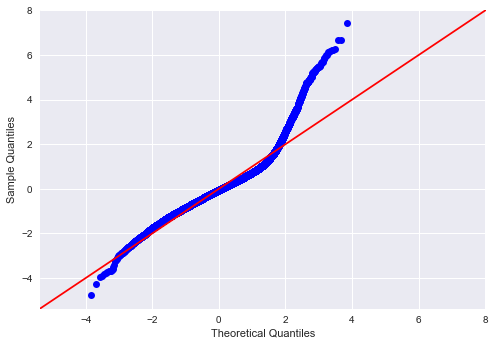

In [84]:
X_int = sm.add_constant(X_train)
model_4b = sm.OLS(y_train, X_int).fit()
fig = sm.graphics.qqplot(model_4b.resid, dist=stats.norm, line='45', fit=True)

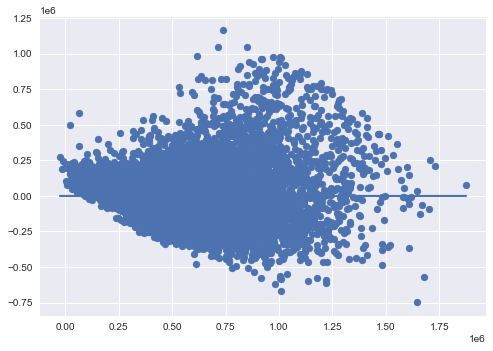

In [85]:
plt.scatter(model_4b.predict(X_int), model_4b.resid)
plt.plot(model_4b.predict(X_int), [0 for i in range(len(X_int))])

The normality of the residuals have improved, but it looks like the assumption is still being violated. Homoscedasticity has also improved, but we still have a slight cone shape. We may need to try transforming our data in order to improve our model further. Before doing that, though, let's check our variables for multicollinearity.

## Model 5: Adjust for Multicollinearity

### Investigate Pairwise Correlation

In [86]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_pairs=data_model_4b.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_pairs.drop_duplicates(inplace=True)

In [87]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,


We can confirm there is no pairwise correlation present.

### Investigate multicollinearity

In [88]:
X = data_model_4b.drop(['price'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_lot', 2.3520260946816336),
 ('sqft_above', 26.798053500094824),
 ('yr_built', 32.59326954893151),
 ('yr_renovated', 1.0648022774583203),
 ('sqft_living15', 27.309313117497698),
 ('sqft_lot15', 2.557560715762715),
 ('has_basement', 2.609962084651896),
 ('bedro_2', 1.4472233655109707),
 ('bedro_4', 2.080151489922795),
 ('bedro_5', 1.3523396054511112),
 ('bedro_6_plus', 1.1257396226202225),
 ('bathr_2_to_3', 3.784434433261295),
 ('bathr_3_to_4', 2.0464498799180326),
 ('bathr_4_to_5', 1.2405879073536417),
 ('bathr_5_to_6', 1.0512201255861977),
 ('bathr_6_plus', 1.0182653729887992),
 ('floor_1.5', 1.3401759617345583),
 ('floor_2.0', 3.925152817052293),
 ('floor_2.5', 1.0644857470145421),
 ('floor_3.0', 1.3282680893651435),
 ('floor_3.5', 1.004984492535364),
 ('water_1.0', 1.3983610165107383),
 ('view_1.0', 1.0469017331723403),
 ('view_2.0', 1.1103634699366323),
 ('view_3.0', 1.0984932587353748),
 ('view_4.0', 1.4415156962832816),
 ('condi_4', 1.57746101843817),
 ('condi_5', 1.193834

In [89]:
vif_scores = list(zip(X.columns, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 10]
multi_co_cols

['sqft_above', 'yr_built', 'sqft_living15']

In [90]:
def r2_calc(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    return metrics.r2_score(y_train, y_hat_train)

### Check Columns to Drop and Run New Model

In [91]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_above','yr_built','sqft_living15'],axis=1)
r2_calc(X,y)

0.5510324583450125

Dropping all of the multicollinear columns leads to too much loss of accuracy in our model. Let's check our R2 score when dropping one of each column.

In [92]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_above'],axis=1)
r2_calc(X,y)

0.6483503196008218

In [93]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'yr_built'],axis=1)
r2_calc(X,y)

0.6964631227549147

In [94]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_living15'],axis=1)
r2_calc(X,y)

0.6808081829896202

In [95]:
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'sqft_living15', 'yr_built'],axis=1)
r2_calc(X,y)

0.6744049457375778

It appears dropping the 'yr_built' column produces the strongest results for our model. Let's drop this column for our 5th model to decrease our multicollinearity.

In [96]:
data_model_5 = data_model_4b.drop(['yr_built'], axis=1)
y = data_model_5['price']
X = data_model_5.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
y_hat_train = model_5.predict(X_train)
y_hat_test = model_5.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6974875716826215

In [97]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 156750.32358819112
RMSE Test: 162287.21724229452


In [98]:
# Perform cross validation
from sklearn.metrics import mean_squared_error, make_scorer
mse = make_scorer(mean_squared_error)

cv_20_results = cross_val_score(model_5, X,y, cv=20, scoring=mse)
np.mean(np.sqrt(cv_20_results))

158135.21361879917

Our RMSE increased slightly but is still much improved from earlier models.

In [99]:
X = data_model_5.drop(['price'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('sqft_lot', 2.3514754746650066),
 ('sqft_above', 25.429187363635357),
 ('yr_renovated', 1.0632409339084976),
 ('sqft_living15', 22.368304840497775),
 ('sqft_lot15', 2.556731851018674),
 ('has_basement', 2.4809139285693846),
 ('bedro_2', 1.3795881277015762),
 ('bedro_4', 2.064246217737315),
 ('bedro_5', 1.3445784683600013),
 ('bedro_6_plus', 1.1248394665723704),
 ('bathr_2_to_3', 3.779431395703396),
 ('bathr_3_to_4', 1.9928835012588202),
 ('bathr_4_to_5', 1.2220919359801536),
 ('bathr_5_to_6', 1.047948058996118),
 ('bathr_6_plus', 1.0175998730537306),
 ('floor_1.5', 1.3396006420836102),
 ('floor_2.0', 3.925151675823041),
 ('floor_2.5', 1.0637698964569713),
 ('floor_3.0', 1.3134991418213564),
 ('floor_3.5', 1.0048253166861605),
 ('water_1.0', 1.3980657987376333),
 ('view_1.0', 1.045237026706228),
 ('view_2.0', 1.1017477495274972),
 ('view_3.0', 1.0860416004587596),
 ('view_4.0', 1.4248429540561391),
 ('condi_4', 1.5189204887626926),
 ('condi_5', 1.1778512063548803),
 ('zipco_98051_to_9

In [100]:
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1193.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:14:00   Log-Likelihood:            -2.2895e+05
No. Observations:               17110   AIC:                         4.580e+05
Df Residuals:                   17076   BIC:                         4.582e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.904e+04   6845.139      7.165      0.000    3.56e+04    6.25e+04
sqft_lot                 0.2067      0.041      5.036      0.000       0.126       0.287
sqft_above             175.5036      3.218     54.535      0.000     169.196     181.812
yr_renovated            48.2889      3.415     14.142      0.000      41.596      54.982
sqft_living15           97.7746      3.021     32.362      0.000      91.853     103.697
sqft_lot15              -0.2275      0.065     -3.523      0.000      -0.354      -0.101
has_basement           8.42e+04   3128.679     26.913      0.000    7.81e+04    9.03e+04
bedro_2               1.706e+04   4022.985      4.240      0.000    9173.792    2.49e+04
bedro_4              -8495.1149   3066.266     -2.771      0.006   -1.45e+04   -2484.918
bedro_5              -1.879e+04   5185.995     -3.624      0.000    -2.9e+04   -8628.046
bedro_6_plus         -7.253e+04   1.06e+04     -6.837      0.000   -9.33e+04   -5.17e+04
bathr_2_to_3          1.432e+04   3527.009      4.061      0.000    7410.316    2.12e+04
bathr_3_to_4          1.088e+05   6427.701     16.930      0.000    9.62e+04    1.21e+05
bathr_4_to_5          1.587e+05   1.48e+04     10.753      0.000     1.3e+05    1.88e+05
bathr_5_to_6          8.797e+04   4.14e+04      2.124      0.034    6797.134    1.69e+05
bathr_6_plus         -1.306e+05   9.16e+04     -1.426      0.154    -3.1e+05     4.9e+04
floor_1.5              1.32e+04   4655.592      2.835      0.005    4074.070    2.23e+04
floor_2.0            -2.922e+04   3844.941     -7.600      0.000   -3.68e+04   -2.17e+04
floor_2.5             5.934e+04   1.56e+04      3.805      0.000    2.88e+04    8.99e+04
floor_3.0             1.445e+04   8258.107      1.750      0.080   -1731.765    3.06e+04
floor_3.5              1.93e+04   7.86e+04      0.246      0.806   -1.35e+05    1.73e+05
water_1.0             2.717e+05   2.14e+04     12.686      0.000     2.3e+05    3.14e+05
view_1.0              8.154e+04   1.03e+04      7.894      0.000    6.13e+04    1.02e+05
view_2.0              6.761e+04   6070.081     11.139      0.000    5.57e+04    7.95e+04
view_3.0              1.532e+05   8354.988     18.331      0.000    1.37e+05     1.7e+05
view_4.0              2.641e+05   1.33e+04     19.867      0.000    2.38e+05     2.9e+05
condi_4               5.161e+04   2959.968     17.435      0.000    4.58e+04    5.74e+04
condi_5                1.05e+05   4641.332     22.628      0.000    9.59e+04    1.14e+05
zipco_98051_to_98100 -4.116e+04   3495.187    -11.777      0.000    -4.8e+04   -3.43e+04
zipco_98101_to_98150  1244.3073   4911.144      0.253      0.800   -8382.041    1.09e+04
zipco_98150_to_98200 -3.286e+04   5002.864     -6.568      0.000   -4.27e+04   -2.31e+04
quadr_2              -6.526e+04   5016.195    -13.010    

Our model lost a minimal amount of accuracy by removing the 'yr_built' column, but our multicollinearity did decrease. For the sake of having a more accurate model, we are going to proceed with this version of the model and leave in the other multicollinear columns, 'sqft_above' and sqft_living_15'. 

## Model 6: Log Transform Variables

Let's go back and check our assumptions of linear regression again.

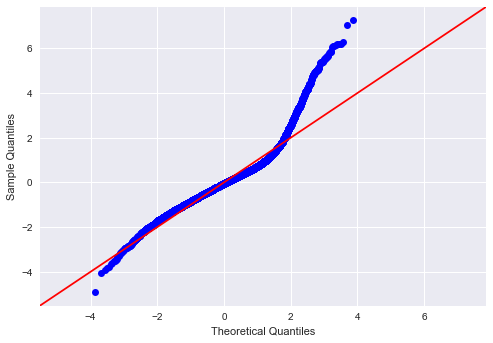

In [101]:
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

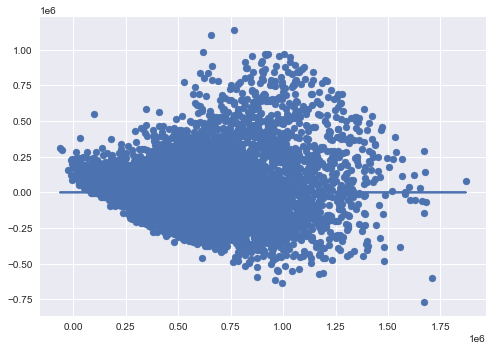

In [102]:
plt.scatter(model_5.predict(X_int), model_5.resid)
plt.plot(model_5.predict(X_int), [0 for i in range(len(X_int))])

We clearly still have some violations of our residual normality and homoscedasticity assumptions. A log transformation may be necessary in this case. Let's look at the distribution of our variables and see if there is a particular variable we should consider log transforming.

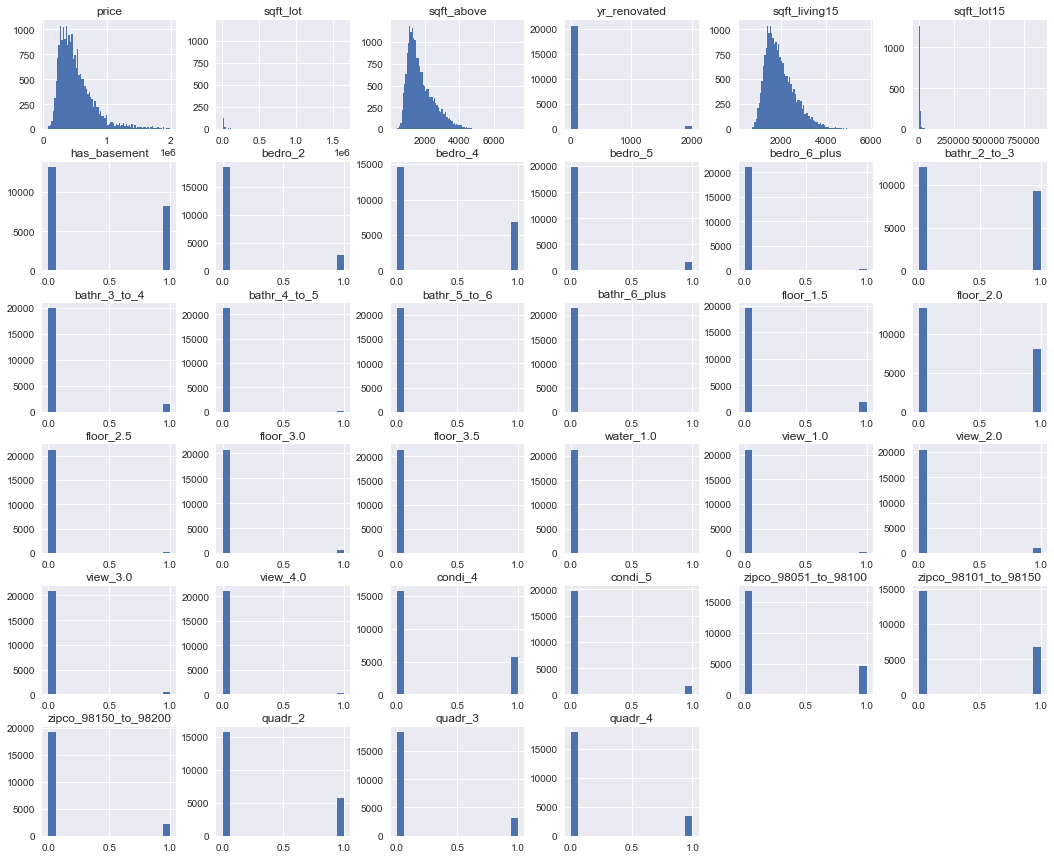

In [103]:
data_model_5.hist(figsize=(18,15), bins = 'auto');

We only have a handful of continuous variables left in our model. Let's run models for 2 different scenarios-- 1) log transforming all of our square footage independent variables, and 2) log transforming our dependent variable, price.

### Log transforming independent variables

In [104]:
data_model_5.describe()

,price,sqft_lot,sqft_above,yr_renovated,sqft_living15,sqft_lot15,has_basement,bedro_2,bedro_4,bedro_5,...,view_3.0,view_4.0,condi_4,condi_5,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4
count,2.138800e+04,2.138800e+04,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,...,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000,21388.000000
mean,5.189090e+05,1.498533e+04,1767.158827,66.909342,1972.077146,12686.611090,0.381850,0.128951,0.317374,0.072097,...,0.022489,0.011689,0.263185,0.078081,0.215448,0.312792,0.103048,0.268375,0.144754,0.163783
std,2.862960e+05,4.096405e+04,792.016244,359.279156,668.209974,27168.696412,0.485851,0.335153,0.465465,0.258654,...,0.148272,0.107484,0.440372,0.268306,0.411142,0.463641,0.304029,0.443124,0.351861,0.370088
min,7.800000e+04,5.200000e+02,370.000000,0.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,5.027000e+03,1190.000000,0.000000,1480.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,7.577500e+03,1550.000000,0.000000,1830.000000,7600.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.350000e+05,1.054850e+04,2190.000000,0.000000,2340.000000,10022.250000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.990000e+06,1.651359e+06,7420.000000,2015.000000,5790.000000,871200.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
sqft = ['sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

col_names = [str(col+'_log') for col in sqft]

data_model_6a = data_model_5.copy()
data_model_6a[col_names] = np.log(data_model_6a[sqft])

In [106]:
data_model_6a.head()

,price,sqft_lot,sqft_above,yr_renovated,sqft_living15,sqft_lot15,has_basement,bedro_2,bedro_4,bedro_5,...,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log
0,221900.0,5650,1180,0.0,1340,5650,0,0,0,0,...,0,0,1,0,0,0,8.639411,7.073270,7.200425,8.639411
1,538000.0,7242,2170,1991.0,1690,7639,1,0,0,0,...,0,1,0,0,0,0,8.887653,7.682482,7.432484,8.941022
2,180000.0,10000,770,0.0,2720,8062,0,1,0,0,...,0,0,0,0,0,0,9.210340,6.646391,7.908387,8.994917
3,604000.0,5000,1050,0.0,1360,5000,1,0,1,0,...,0,1,0,0,0,0,8.517193,6.956545,7.215240,8.517193
4,510000.0,8080,1680,0.0,1800,7503,0,0,0,0,...,1,0,0,1,0,0,8.997147,7.426549,7.495542,8.923058


In [107]:
data_model_6a.drop(sqft, inplace=True, axis=1)

In [108]:
y = data_model_6a['price']
X = data_model_6a.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
model_6a = LinearRegression()
model_6a.fit(X_train, y_train)
y_hat_train = model_6a.predict(X_train)
y_hat_test = model_6a.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6792851169194348

### Log transforming dependent variable

In [109]:
data_model_6b = data_model_5.copy()

In [110]:
data_model_6b['price_log'] = np.log(data_model_6b['price'])

<AxesSubplot:>

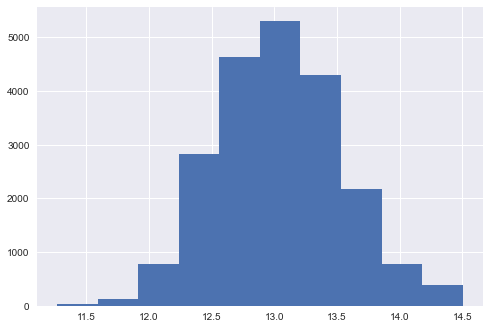

In [111]:
data_model_6b.price_log.hist()

In [112]:
y = data_model_6b['price_log']
X = data_model_6b.drop(['price', 'price_log'],axis=1)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=22)
model_6b = LinearRegression()
model_6b.fit(X_train, y_train_log)
y_hat_train_log = model_6b.predict(X_train)
y_hat_test_log = model_6b.predict(X_test)
metrics.r2_score(y_train_log, y_hat_train_log)

0.7384629254211739

This looks much better! Let's check our RMSE values. We will need to inverse transform our residuals in order to interpret our error correctly.

In [113]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train_log, y_hat_train_log)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test_log, y_hat_test_log)))

RMSE Train: 0.25537642348252104
RMSE Test: 0.2611051698994695


In [114]:
y_hat_train = np.exp(y_hat_train_log)
y_hat_test = np.exp(y_hat_test_log)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


RMSE Train: 159508.90549190796
RMSE Test: 166728.85001795844


In [115]:
X_int = sm.add_constant(X_train)
model_6 = sm.OLS(y_train_log, X_int).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1461.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:14:20   Log-Likelihood:                -922.60
No. Observations:               17110   AIC:                             1913.
Df Residuals:                   17076   BIC:                             2177.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1861      0.011   1092.722      0.000      12.164      12.208
sqft_lot              5.304e-07   6.69e-08      7.933      0.000    3.99e-07    6.61e-07
sqft_above               0.0003   5.24e-06     54.041      0.000       0.000       0.000
yr_renovated          7.384e-05   5.56e-06     13.274      0.000    6.29e-05    8.47e-05
sqft_living15            0.0002   4.92e-06     34.427      0.000       0.000       0.000
sqft_lot15           -1.232e-07   1.05e-07     -1.171      0.242   -3.29e-07     8.3e-08
has_basement             0.1771      0.005     34.742      0.000       0.167       0.187
bedro_2                 -0.0082      0.007     -1.258      0.209      -0.021       0.005
bedro_4                 -0.0032      0.005     -0.634      0.526      -0.013       0.007
bedro_5                 -0.0305      0.008     -3.607      0.000      -0.047      -0.014
bedro_6_plus            -0.0722      0.017     -4.178      0.000      -0.106      -0.038
bathr_2_to_3             0.0626      0.006     10.887      0.000       0.051       0.074
bathr_3_to_4             0.0906      0.010      8.655      0.000       0.070       0.111
bathr_4_to_5             0.0389      0.024      1.620      0.105      -0.008       0.086
bathr_5_to_6            -0.1668      0.067     -2.472      0.013      -0.299      -0.035
bathr_6_plus            -0.2602      0.149     -1.743      0.081      -0.553       0.032
floor_1.5                0.0523      0.008      6.894      0.000       0.037       0.067
floor_2.0               -0.0105      0.006     -1.671      0.095      -0.023       0.002
floor_2.5                0.0734      0.025      2.890      0.004       0.024       0.123
floor_3.0                0.0723      0.013      5.376      0.000       0.046       0.099
floor_3.5                0.1439      0.128      1.123      0.261      -0.107       0.395
water_1.0                0.4204      0.035     12.046      0.000       0.352       0.489
view_1.0                 0.1499      0.017      8.907      0.000       0.117       0.183
view_2.0                 0.1223      0.010     12.364      0.000       0.103       0.142
view_3.0                 0.1909      0.014     14.023      0.000       0.164       0.218
view_4.0                 0.2927      0.022     13.518      0.000       0.250       0.335
condi_4                  0.0934      0.005     19.358      0.000       0.084       0.103
condi_5                  0.1704      0.008     22.533      0.000       0.156       0.185
zipco_98051_to_98100    -0.0346      0.006     -6.071      0.000      -0.046      -0.023
zipco_98101_to_98150     0.0641      0.008      8.017      0.000       0.048       0.080
zipco_98150_to_98200    -0.0206      0.008     -2.531      0.011      -0.037      -0.005
quadr_2                 -0.0512      0.008     -6.271    

This model has both a high R2 and lower RMSE. Before finalizing our model, let's remove any variables with p-values below 0.05, and check our assumptions one last time.

In [116]:
cols_to_drop = ['sqft_lot15','bathr_4_to_5', 'bathr_6_plus', 'floor_3.5']

In [117]:
data_model_6c = data_model_6b.drop(cols_to_drop, axis=1)

In [118]:
y = data_model_6c['price_log']
X = data_model_6c.drop(['price', 'price_log'],axis=1)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=22)
model_final = LinearRegression()
model_final.fit(X_train, y_train_log)
y_hat_train_log = model_final.predict(X_train)
y_hat_test_log = model_final.predict(X_test)
metrics.r2_score(y_train_log, y_hat_train_log)

0.7383308231002311

In [119]:
y_hat_train = np.exp(y_hat_train_log)
y_hat_test = np.exp(y_hat_test_log)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


RMSE Train: 159589.45785970133
RMSE Test: 166871.9853014313


In [120]:
X_int = sm.add_constant(X_train)
model_final_ols = sm.OLS(y_train_log, X_int).fit()
model_final_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1662.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:14:21   Log-Likelihood:                -926.92
No. Observations:               17110   AIC:                             1914.
Df Residuals:                   17080   BIC:                             2146.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.1846      0.011   1102.091      0.000      12.163      12.206
sqft_lot              4.787e-07   4.98e-08      9.612      0.000    3.81e-07    5.76e-07
sqft_above               0.0003   5.06e-06     56.209      0.000       0.000       0.000
yr_renovated          7.389e-05   5.56e-06     13.281      0.000     6.3e-05    8.48e-05
sqft_living15            0.0002   4.91e-06     34.469      0.000       0.000       0.000
has_basement             0.1779      0.005     35.458      0.000       0.168       0.188
bedro_2                 -0.0080      0.007     -1.223      0.221      -0.021       0.005
bedro_4                 -0.0029      0.005     -0.589      0.556      -0.013       0.007
bedro_5                 -0.0290      0.008     -3.440      0.001      -0.045      -0.012
bedro_6_plus            -0.0708      0.017     -4.167      0.000      -0.104      -0.038
bathr_2_to_3             0.0606      0.005     11.049      0.000       0.050       0.071
bathr_3_to_4             0.0870      0.010      8.707      0.000       0.067       0.107
bathr_5_to_6            -0.1720      0.067     -2.559      0.010      -0.304      -0.040
floor_1.5                0.0519      0.008      6.843      0.000       0.037       0.067
floor_2.0               -0.0096      0.006     -1.543      0.123      -0.022       0.003
floor_2.5                0.0746      0.025      2.936      0.003       0.025       0.124
floor_3.0                0.0742      0.013      5.542      0.000       0.048       0.100
water_1.0                0.4197      0.035     12.029      0.000       0.351       0.488
view_1.0                 0.1498      0.017      8.903      0.000       0.117       0.183
view_2.0                 0.1219      0.010     12.326      0.000       0.103       0.141
view_3.0                 0.1909      0.014     14.031      0.000       0.164       0.218
view_4.0                 0.2931      0.022     13.536      0.000       0.251       0.336
condi_4                  0.0931      0.005     19.315      0.000       0.084       0.103
condi_5                  0.1703      0.008     22.523      0.000       0.156       0.185
zipco_98051_to_98100    -0.0348      0.006     -6.122      0.000      -0.046      -0.024
zipco_98101_to_98150     0.0640      0.008      8.007      0.000       0.048       0.080
zipco_98150_to_98200    -0.0210      0.008     -2.578      0.010      -0.037      -0.005
quadr_2                 -0.0518      0.008     -6.339      0.000      -0.068      -0.036
quadr_3                 -0.5380      0.008    -70.907      0.000      -0.553      -0.523
quadr_4                 -0.4648      0.009    -53.820      0.000      -0.482      -0.448
==============================================================================
Omnibus:                      433.974   Durbin-Watson:             

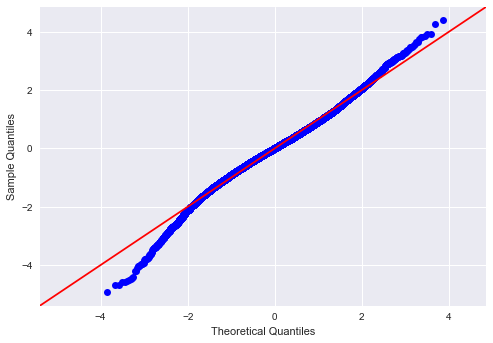

In [121]:
fig = sm.graphics.qqplot(model_final_ols.resid, dist=stats.norm, line='45', fit=True)

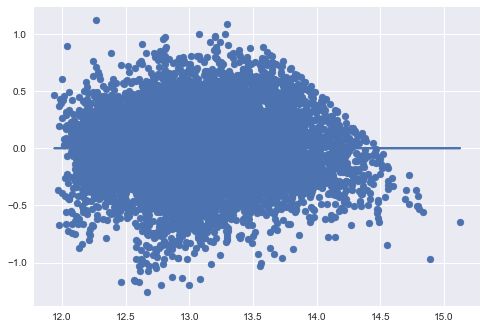

In [122]:
plt.scatter(model_final_ols.predict(X_int), model_final_ols.resid)
plt.plot(model_final_ols.predict(X_int), [0 for i in range(len(X_int))])

Normality and homoscedasticity have improved enough that we are going to accept this model as final.

# Evaluation - Final Model Interpretation

First, let's print the coefficients of our final model, and transform them to be interpretted correctly, taking into account the dependent variable log transformation.

In [123]:
# Save model data as final version
data_model_final = data_model_6c.copy()

In [124]:
model_final.coef_

array([ 4.78733872e-07,  2.84545236e-04,  7.38884907e-05,  1.69261571e-04,
        1.77945058e-01, -8.01530236e-03, -2.94096838e-03, -2.89633402e-02,
       -7.08347283e-02,  6.06487388e-02,  8.69804398e-02, -1.71981769e-01,
        5.18741940e-02, -9.61866949e-03,  7.45869467e-02,  7.41958569e-02,
        4.19731176e-01,  1.49836272e-01,  1.21894751e-01,  1.90934479e-01,
        2.93134699e-01,  9.31122270e-02,  1.70329607e-01, -3.48390798e-02,
        6.40364127e-02, -2.10071694e-02, -5.17735878e-02, -5.38024492e-01,
       -4.64760315e-01])

In [125]:
model_final.transformed_coef = (np.exp(model_final.coef_)-1)*100

In [131]:
coeff_df = pd.DataFrame(model_final.transformed_coef, X.columns, columns = ['Coeff'])

In [140]:
coeff_df

,Coeff
sqft_lot,0.000048
sqft_above,0.028459
yr_renovated,0.007389
sqft_living15,0.016928
has_basement,19.475968
bedro_2,-0.798327
bedro_4,-0.293665
bedro_5,-2.854792
bedro_6_plus,-6.838415
bathr_2_to_3,6.252562


In [159]:
coeff_top_10 = coeff_df.sort_values('Coeff', ascending=False, axis=0).head(10)

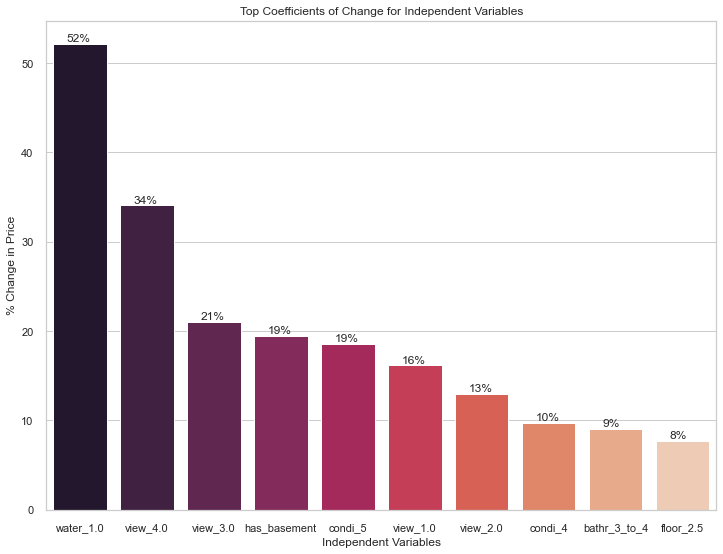

In [184]:
sns.set_context('notebook')
sns.set_style('whitegrid')
plt.figure(figsize=(12,9))
ax = sns.barplot(x = coeff_top_10.index, y = coeff_top_10['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Top Coefficients of Change for Independent Variables')
ax.set(xlabel='Independent Variables', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/4),
            y = height+.25,
            s = '{:.0f}%'.format(height)) 
#plt.savefig('images\top_coefficents.png');

## Conclusions

**Houses with more views have higher prices.** Our 'view' variable that was converted into dummy variables represents how many times a house on the market was viewed. As the number of times a house is viewed increases from 0 to 4, the price of the house increases by 34%. This seems logical, as the more times a house is viewed, the more likely there is to be competition among buyers, driving a higher price. The seller could try to increase views by increasing the number of open houses held, which in turn could increase price.

In [185]:
views = coeff_df.loc[['view_4.0', 'view_3.0', 'view_2.0', 'view_1.0']]

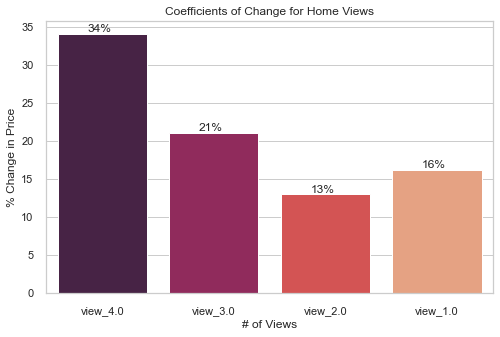

In [189]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = views.index, y = views['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Coefficients of Change for Home Views')
ax.set(xlabel='# of Views', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/3),
            y = height+.25,
            s = '{:.0f}%'.format(height)); 
# plt.savefig("images\views.png")

**Houses with 3 to 4 bathrooms have higher prices.** As the number of bathrooms increases from 1 to 3-4, housing prices increase by ~9%. This is useful information if a seller is trying to make renovations to increase price. Increasing the number of bathrooms to 3-4 could have a significant impact on raising the price. Additionally, increasing for 1 to 2-3 bathrooms could lead to a 6.25% price increase.

In [191]:
bathrooms = coeff_df.loc[['bathr_2_to_3', 'bathr_3_to_4', 'bathr_5_to_6']]

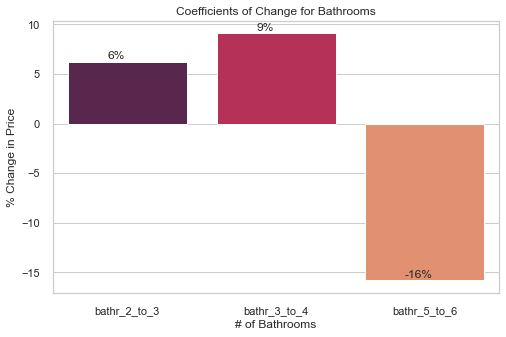

In [192]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = bathrooms.index, y = bathrooms['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Coefficients of Change for Bathrooms')
ax.set(xlabel='# of Bathrooms', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/3),
            y = height+.25,
            s = '{:.0f}%'.format(height)); 
# plt.savefig("images\bathrooms.png")

**Houses with Conditions of 5 have higher prices.** Compared to houses with a condition of 1, houses with condition of 5 cause a 18.5% increase in price. This seems logical, as the nicer condition a house is in the higher the asking price. By renovating some rooms in the home, a seller could increase its condition on the scale. Homes with a condition of 4 also have a price 9.8% higher on average, so there still could be value in trying to improve a home's condition, even if it cannot reach a 5 condition. 

In [193]:
conditions = coeff_df.loc[['condi_4', 'condi_5']]

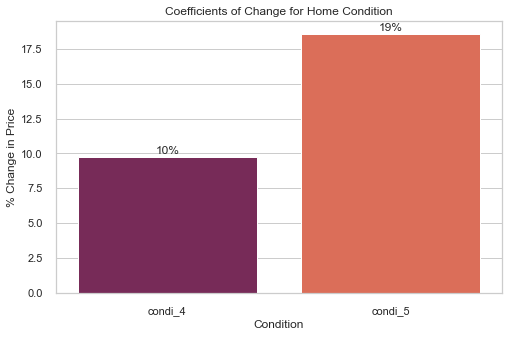

In [198]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = conditions.index, y = conditions['Coeff'], 
            data=coeff_top_10, palette = 'rocket')
ax.set_title('Coefficients of Change for Home Condition')
ax.set(xlabel='Condition', ylabel= '% Change in Price')

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = p.get_x()+(width/2.3),
            y = height+.25,
            s = '{:.0f}%'.format(height)); 
# plt.savefig("images\bathrooms.png")

### Other Considerations

**Water.** Our model found that having a waterfront property coincides with the highest price percentage increase than any other feature--a house with water has a 53% higher price on average than one without. Since this is not a feature a seller can change about their property, we did not highlight it in our analysis.

**Basement.** Having a basement is another highly influential feature of housing prices, as houses with basements have a 16% higher price on average than houses without basements. Again, though, it would be very difficult for a seller to change the structure of their house to add a basement, so this feature also was not highlighted.

**6+ bedrooms.** Our model concluded that having a house with more than 5 bedrooms have a lower price by 6% on average. This isn't a very logical conclusion, and is likely due to our dataset not including enough houses with this feature. We would need to further explore homes of this size, and it may be useful to drop these homes from our dataset in the future. We run into a similar issue with 5-6 bathrooms, which is showing a 16% decrease in price on average.

**Location.** Location, whether zipcode or quadrant, also had a significant effect on price--living in quadrant 4 lowered price by 42% compared with houses in quadrant 1. However, a home seller cannot change the location of their current house. This information could be useful in a different context, for example, if location was unimportant to a buyer compared to the attributes of the house, the buyer could use this information to find a less expensive house in quadrant 4.

### Exploring the Final Model

In [ ]:
plt.scatter(y_test, y_hat_test)

In [ ]:
plt.hist(y_test - y_hat_test, bins='auto');

Our residuals look normally distributed, which is encouraging that our model meets the residual normality assumption.

In [ ]:
data_model_final.price.describe()

In [171]:
data_model_final.head()

,price,sqft_lot,sqft_above,yr_renovated,sqft_living15,has_basement,bedro_2,bedro_4,bedro_5,bedro_6_plus,...,view_4.0,condi_4,condi_5,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4,price_log
0,221900.0,5650,1180,0.0,1340,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,12.309982
1,538000.0,7242,2170,1991.0,1690,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,13.195614
2,180000.0,10000,770,0.0,2720,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12.100712
3,604000.0,5000,1050,0.0,1360,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,13.311329
4,510000.0,8080,1680,0.0,1800,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,13.142166


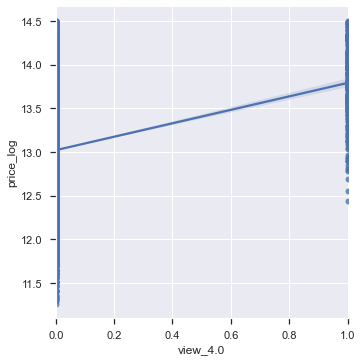

In [174]:
sns.lmplot(x='view_4.0', y='price_log', data=data_model_final);